# 3. Imputing or Removing Missing Values

Many real-world datasets may contain missing values for various reasons. They are often encoded as ***NaNs, blanks or any other placeholders***. Training a model with a dataset that has a lot of missing values can **drastically impact **the machine learning model’s quality. Some algorithms such as scikit-learn estimators assume that all values are numerical and have and hold meaningful value.

One way to handle this problem is to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. A better strategy would be to **impute the missing values**. In other words, we need to ***infer*** those missing values from the existing part of the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 865.6+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 865.6+ KB


From above we can see Total Number of records = 8523

also we can see some columns have misssing value/null's.... Like Iteam Weight, Outlet_Size..

Let see a better way to calculate & understand null/blank or missing values

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Calculate % Of Null/Missing Value in Dataframe

In [ ]:
df.isnull().sum()/len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
df.Item_Weight

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

## Before we Take Any Action - Lets Understand better about Missing Data Type & how we can fix them

There are three main types of missing data:

1.   Missing completely at random (MCAR)
2.   Missing at random (MAR) 
3. Not missing at random (NMAR)

# MCAR

Missing Completely at Random, MCAR, means there is no relationship between the missingness of the data and any values, observed or missing. There is nothing systematic going on that makes some data more likely to be missing than others.

# MAR

Missing at Random, MAR, means there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data.  So, for example, if men are more likely to tell you their weight than women, weight is MAR.

# MNAR

Missing Not at Random, MNAR, means there is a relationship between the propensity of a value to be missing and its values.

Example: people with the lowest education are missing on education or the sickest people are most likely to drop out of the study.

# Thumb Rule:

https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-017-0442-1 

---


IF (missing values are less than 5% of observed values)  THEN  ignore them

IF (missing values are greater than 40%) THEN avoid using the variable in analysis.



---



IF ((missing data is between 5 % and 40 % ) AND 

	IF (variable is dependent)  
	THEN report analysis results as worst case scenario

	IF (variable is not dependent) AND 
		IF (MCAR assumption is plausible) OR (NMAR is plausible) 
		THEN report analysis result as worst case scenario.
---

In short imputing is possible 

IF ((missing data is between 5 % and 40 % ) AND 
MAR assumption is plausible 

for which Multiple imputation should be used.	
---



# Using MICE algorithm

Now since we understand 

* What is Missing Values 
* Type of Missing Values 
* Importance to Impute Missing Values 

Lets Start Imputation of Missing Value...

In [ ]:
import statsmodels as sm
from statsmodels.imputation import mice

In [ ]:
len(df)

8523

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000


In [ ]:
df['rowno'] = np.arange(len(df))

In [ ]:
df_sub = df.filter(["Item_Weight", "Item_MRP", "Item_Outlet_Sales","rowno"])

In [ ]:
dfm=mice.MICEData(df_sub)
#Perform mice iterations specified, m_iter=50
dfm.update_all((50))
x=dfm.data
y=df_sub[df_sub["Item_Weight"].isnull() == True]
print(x)

      Item_Weight  Item_MRP  Item_Outlet_Sales  rowno
0           9.300  249.8092          3735.1380      0
1           5.920   48.2692           443.4228      1
2          17.500  141.6180          2097.2700      2
3          19.200  182.0950           732.3800      3
4           8.930   53.8614           994.7052      4
...           ...       ...                ...    ...
8518        6.865  214.5218          2778.3834   8518
8519        8.380  108.1570           549.2850   8519
8520       10.600   85.1224          1193.1136   8520
8521        7.210  103.1332          1845.5976   8521
8522       14.800   75.4670           765.6700   8522

[8523 rows x 4 columns]


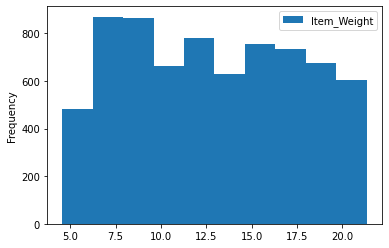

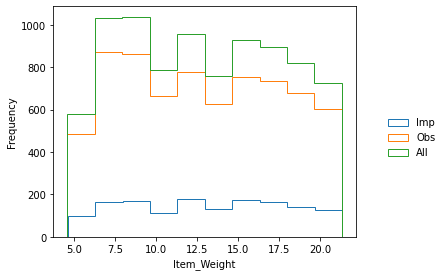

In [ ]:
#let us now compare the distribution of original values and imputed values
df.filter(["Item_Weight"]).plot.hist()
dfm.plot_imputed_hist('Item_Weight')
plt.show()

# The distribution of original values is not impacted by imputation. So We can safely replace the nulls in main data.

In [ ]:
#replace nulls from imputed dataframe to main dataframe using rowno.
df.loc[df.rowno.isin(x.rowno),"Item_Weight"] = x.Item_Weight

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  rowno                      8523 non-null   int64  
dtypes: float64(4), int64(1), object(8)
memory usage:

In [ ]:
df_imputed=df.copy()